## Code Skeleton
Some sample code that imports the dataset and can be used as a skeleton for implementing the algorithms

## Importing Necessary Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dense, LeakyReLU
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


## Loading in the Dataset

In [27]:
csv_url = 'https://gist.github.com/NickyDCFP/d675b176350f6a1d54455ffc35e350f9/raw/' + \
          '220fdbc2aec82b8b3e33681e4465813c02b5fccf/Spotify_Youtube.csv'
csv_df = pd.read_csv(csv_url)
# This column may not be necessary (duplicate of index), may remove
csv_df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
csv_df.head()

,ID,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [28]:
irrelevant_columns = ["Url_spotify", "Uri", "Url_youtube", "ID", "Artist", "Track", "Album", "Album_type", "Title", "Channel", "Description", 'Licensed', 'official_video'] # For now, dropping all non-numeric columns
df = csv_df.drop(irrelevant_columns, axis=1)

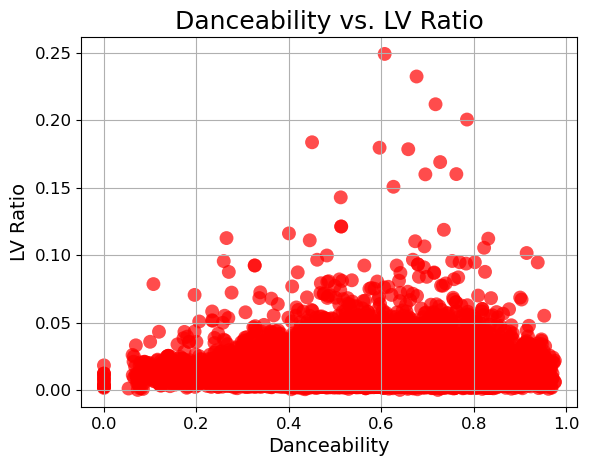

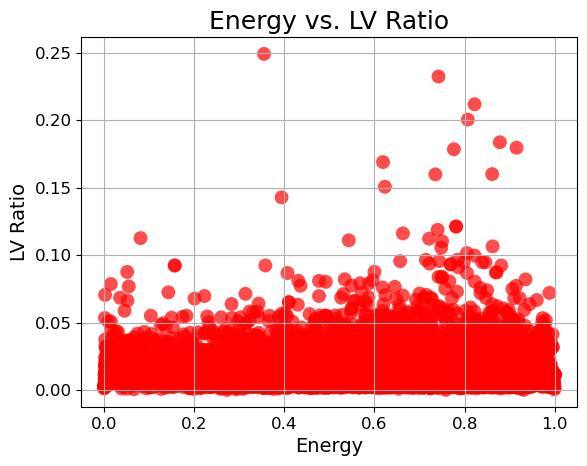

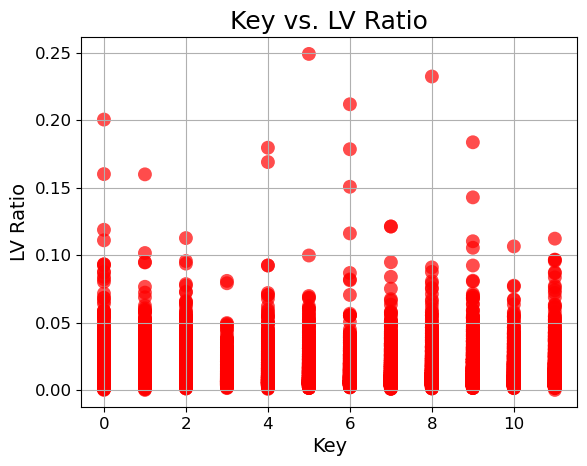

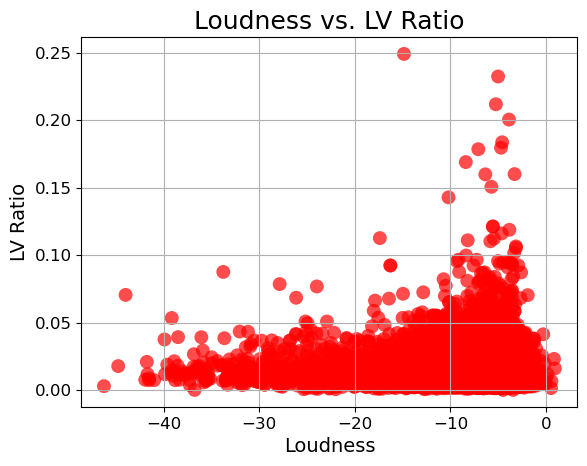

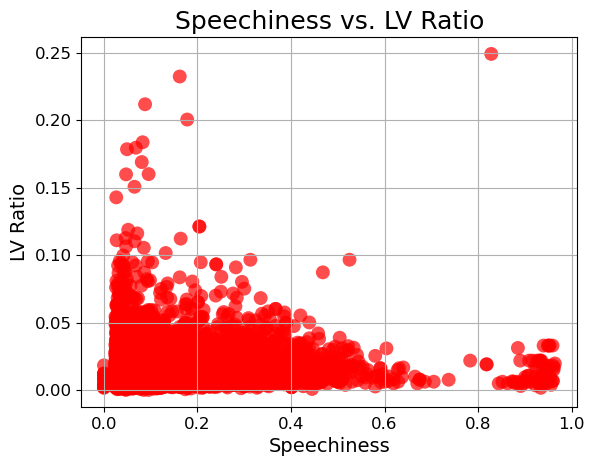

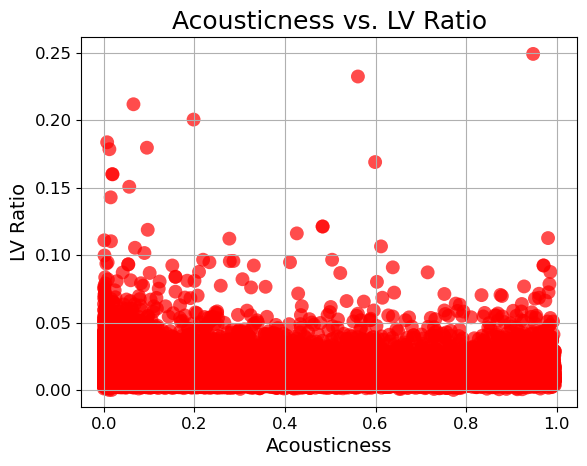

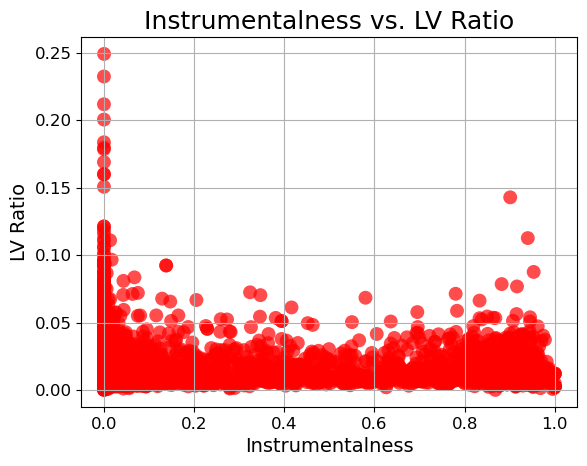

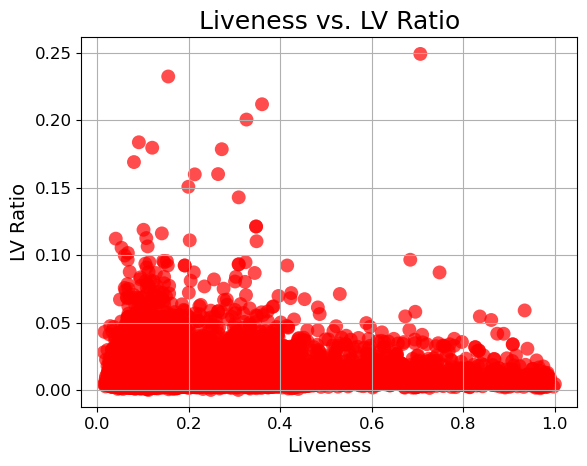

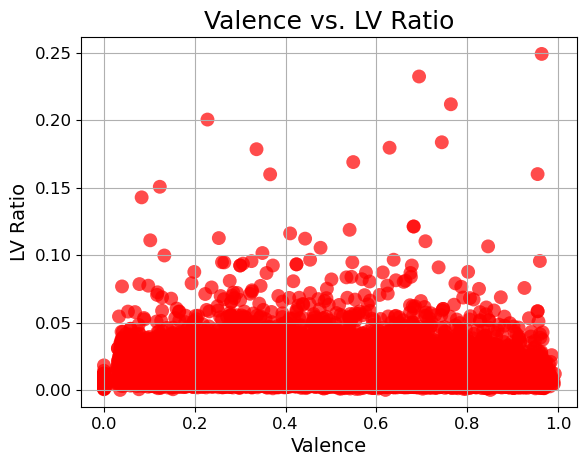

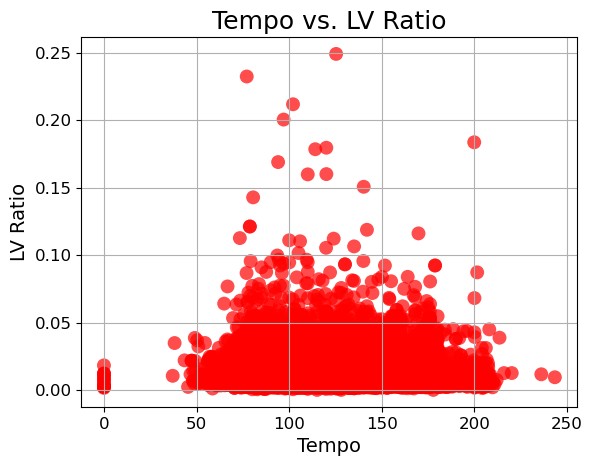

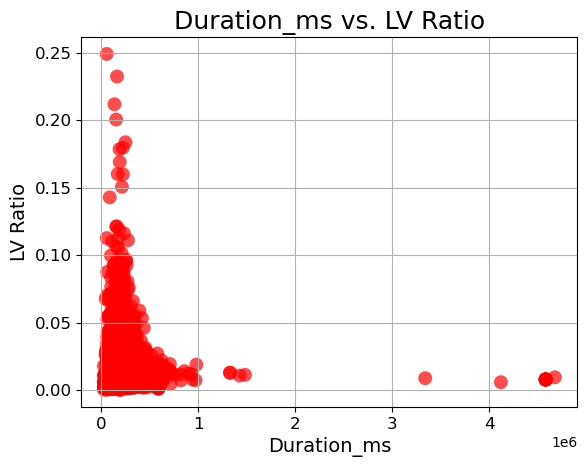

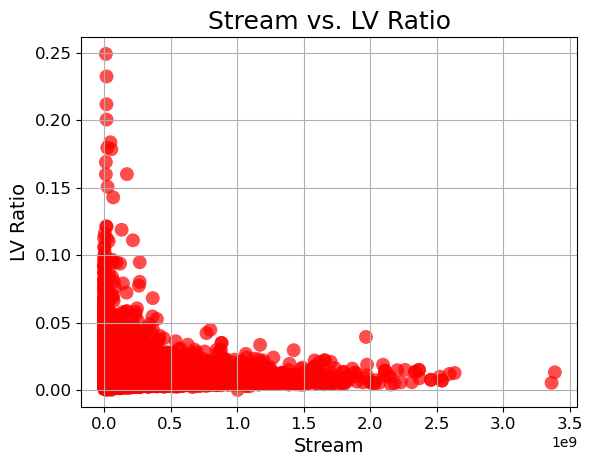

'    Source: https://www.kaggle.com/code/danielsmiech/spotify-youtube-eda-and-ols-regression'

In [29]:
df = df.dropna()
df = df.loc[df['Views'] != 0]
y = (df['Likes'].to_numpy() / df['Views'].to_numpy()).astype('float32')
for feature in ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Stream']:
    plt.scatter((df[feature].to_numpy()), y, s=100, c='red', alpha=0.7, edgecolors='none')
    plt.title(f'{feature} vs. LV Ratio', fontsize=18)
    plt.xlabel(f'{feature}' , fontsize=14)
    plt.ylabel('LV Ratio', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.show()

'    Source: https://www.kaggle.com/code/danielsmiech/spotify-youtube-eda-and-ols-regression'

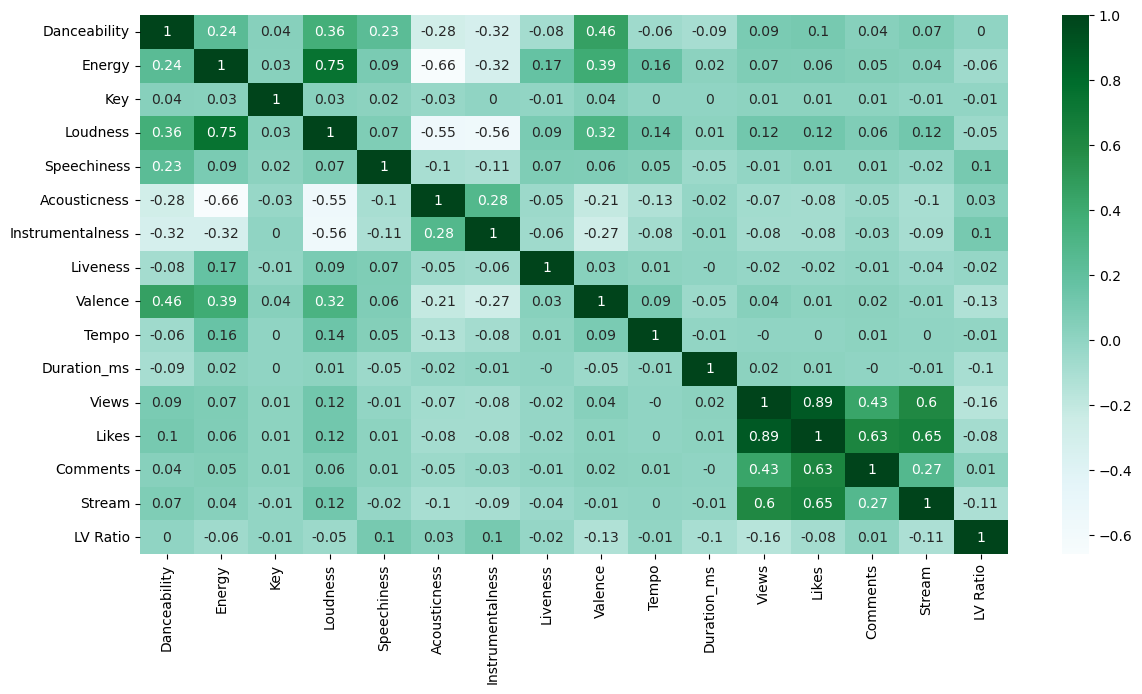

In [30]:

fig,ax=plt.subplots(figsize=(14, 7))
df['LV Ratio'] = (df['Likes'] / df['Views']).astype('float32')
sns.heatmap(data=df.corr().round(2),annot=True,cmap="BuGn")
plt.show()

In [31]:
df.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream', 'LV Ratio'],
      dtype='object')

In [32]:
y_col = 'Stream'
# df = df.dropna(subset=y_cols), 
# dropping all nan values as a stopgap for now
df = df.drop(columns=['LV Ratio'])
y=df[y_col].to_numpy()
X_df = df.drop(y_col, axis=1)
X = np.array(X_df).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def r2(y_true, y_pred):
    score = tf.py_function(r2_score, (y_true, y_pred), tf.float64)
    return score



model = keras.Sequential([
            Dense(20, activation='sigmoid', input_shape=(X_train_scaled.shape[1], )),
            Dense(10 , activation='sigmoid'),
            Dense(1)
        ])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[r2])
model.fit(X_train_scaled, y_train, epochs=150, batch_size=150, verbose=0)
loss, r_2 = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'{loss}, {r_2}')

8.167510814543053e+16, -0.447131872177124
